Fetched ComCat catalog in 19.950860023498535 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2008-06-09 22:59:47.120000+00:00
End Date: 2017-12-31 19:09:31.700000+00:00
Min Latitude: 35.0083 and Max Latitude: 36.9963
Min Longitude: -99.3909 and Max Longitude: -96.1792
Min Magnitude: 3.0
Found 2612 events in the ComCat catalog.


<Axes: xlabel='Rescaled time ($\\log_{10} T$)', ylabel='Rescaled distance ($\\log_{10} R$)'>

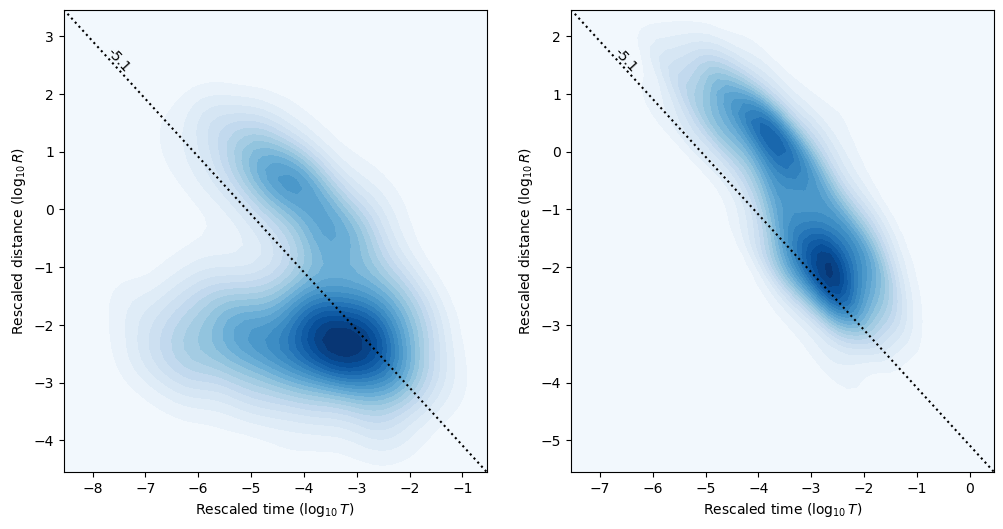

In [1]:
from datetime import datetime

import csep
import matplotlib.pyplot as plt

import bruces

# Download catalog
start_time = datetime(1900, 1, 1)
end_time = datetime(2022, 1, 1)
catalog = csep.query_comcat(
    start_time=start_time,
    end_time=end_time,
    min_magnitude=1.0,
    min_latitude=15.0,
    max_latitude=28.0,
    min_longitude=-90,
    max_longitude=-98.0,
)

# Decluster pycsep catalog
cat = bruces.from_csep(catalog)
eta_0 = cat.fit_cutoff_threshold()
catd = cat.decluster(method="thinning", eta_0=eta_0)

# Display declustering result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cat.plot_time_space_distances(eta_0=eta_0, eta_0_diag=eta_0, ax=ax[0])
catd.plot_time_space_distances(eta_0=eta_0, eta_0_diag=eta_0, ax=ax[1])

In [5]:
"""
Declustering of earthquake catalog
==================================

This example shows how to decluster a catalog using the method :meth:`bruces.Catalog.decluster`.

This example starts by downloading a ComCat catalog with :mod:`pycsep`.

"""

from datetime import datetime, timedelta
import bruces
import csep
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Download catalog
start_time = datetime(1900, 1, 1)
end_time = datetime(2022, 1, 1)
catalog = csep.query_comcat(
    start_time=start_time,
    end_time=end_time,
    min_magnitude=1.0,
    min_latitude=15.0,
    max_latitude=28.0,
    min_longitude=-90,
    max_longitude=-98.0,
)

# file_path = '../data/Cleaned_ISC_Data.csv'
# catalog = pd.read_csv(file_path)

# Plot full catalog's seismicity rate
cat = bruces.from_csep(catalog)
dt = timedelta(days=30)
tbins = np.arange(start_time, end_time, dt)
rates, dates = cat.seismicity_rate(tbins)

plt.figure()
plt.bar(dates, rates / 12.0, width=dt, label="full")

# Decluster and plot declustered catalogs' seismicity rates
algorithms = {
    "reasenberg": {},
    "gardner-knopoff": {"window": "uhrhammer"},
    "nearest-neighbor": {"use_depth": True, "seed": 0},
}
for algorithm, kwargs in algorithms.items():
    catd = cat.decluster(algorithm=algorithm, **kwargs)
    rates, dates = catd.seismicity_rate(tbins)
    plt.bar(dates, rates / 12.0, width=dt, label=algorithm)

plt.xlim(start_time, end_time)
plt.xlabel("Time (year)")
plt.ylabel("Number of events")
plt.legend(frameon=False)

Fetched ComCat catalog in 497.8719129562378 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: None
End Date: None
Min Latitude: None and Max Latitude: None
Min Longitude: None and Max Longitude: None
Min Magnitude: None
Found 0 events in the ComCat catalog.


ValueError: zero-size array to reduction operation minimum which has no identity